In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# dataset: https://www.kaggle.com/datasets/anubhavgoyal10/laptop-prices-dataset
df = pd.read_csv("laptopPrice.csv")
print(df.shape)
df.head()

(823, 19)


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [4]:
import math
def plot_all_countplot(df):
    num_cols = df.select_dtypes(include="object").columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize = (10 * n_cols, 5 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(x=df[col], palette="Set2")
        plt.title(f"{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

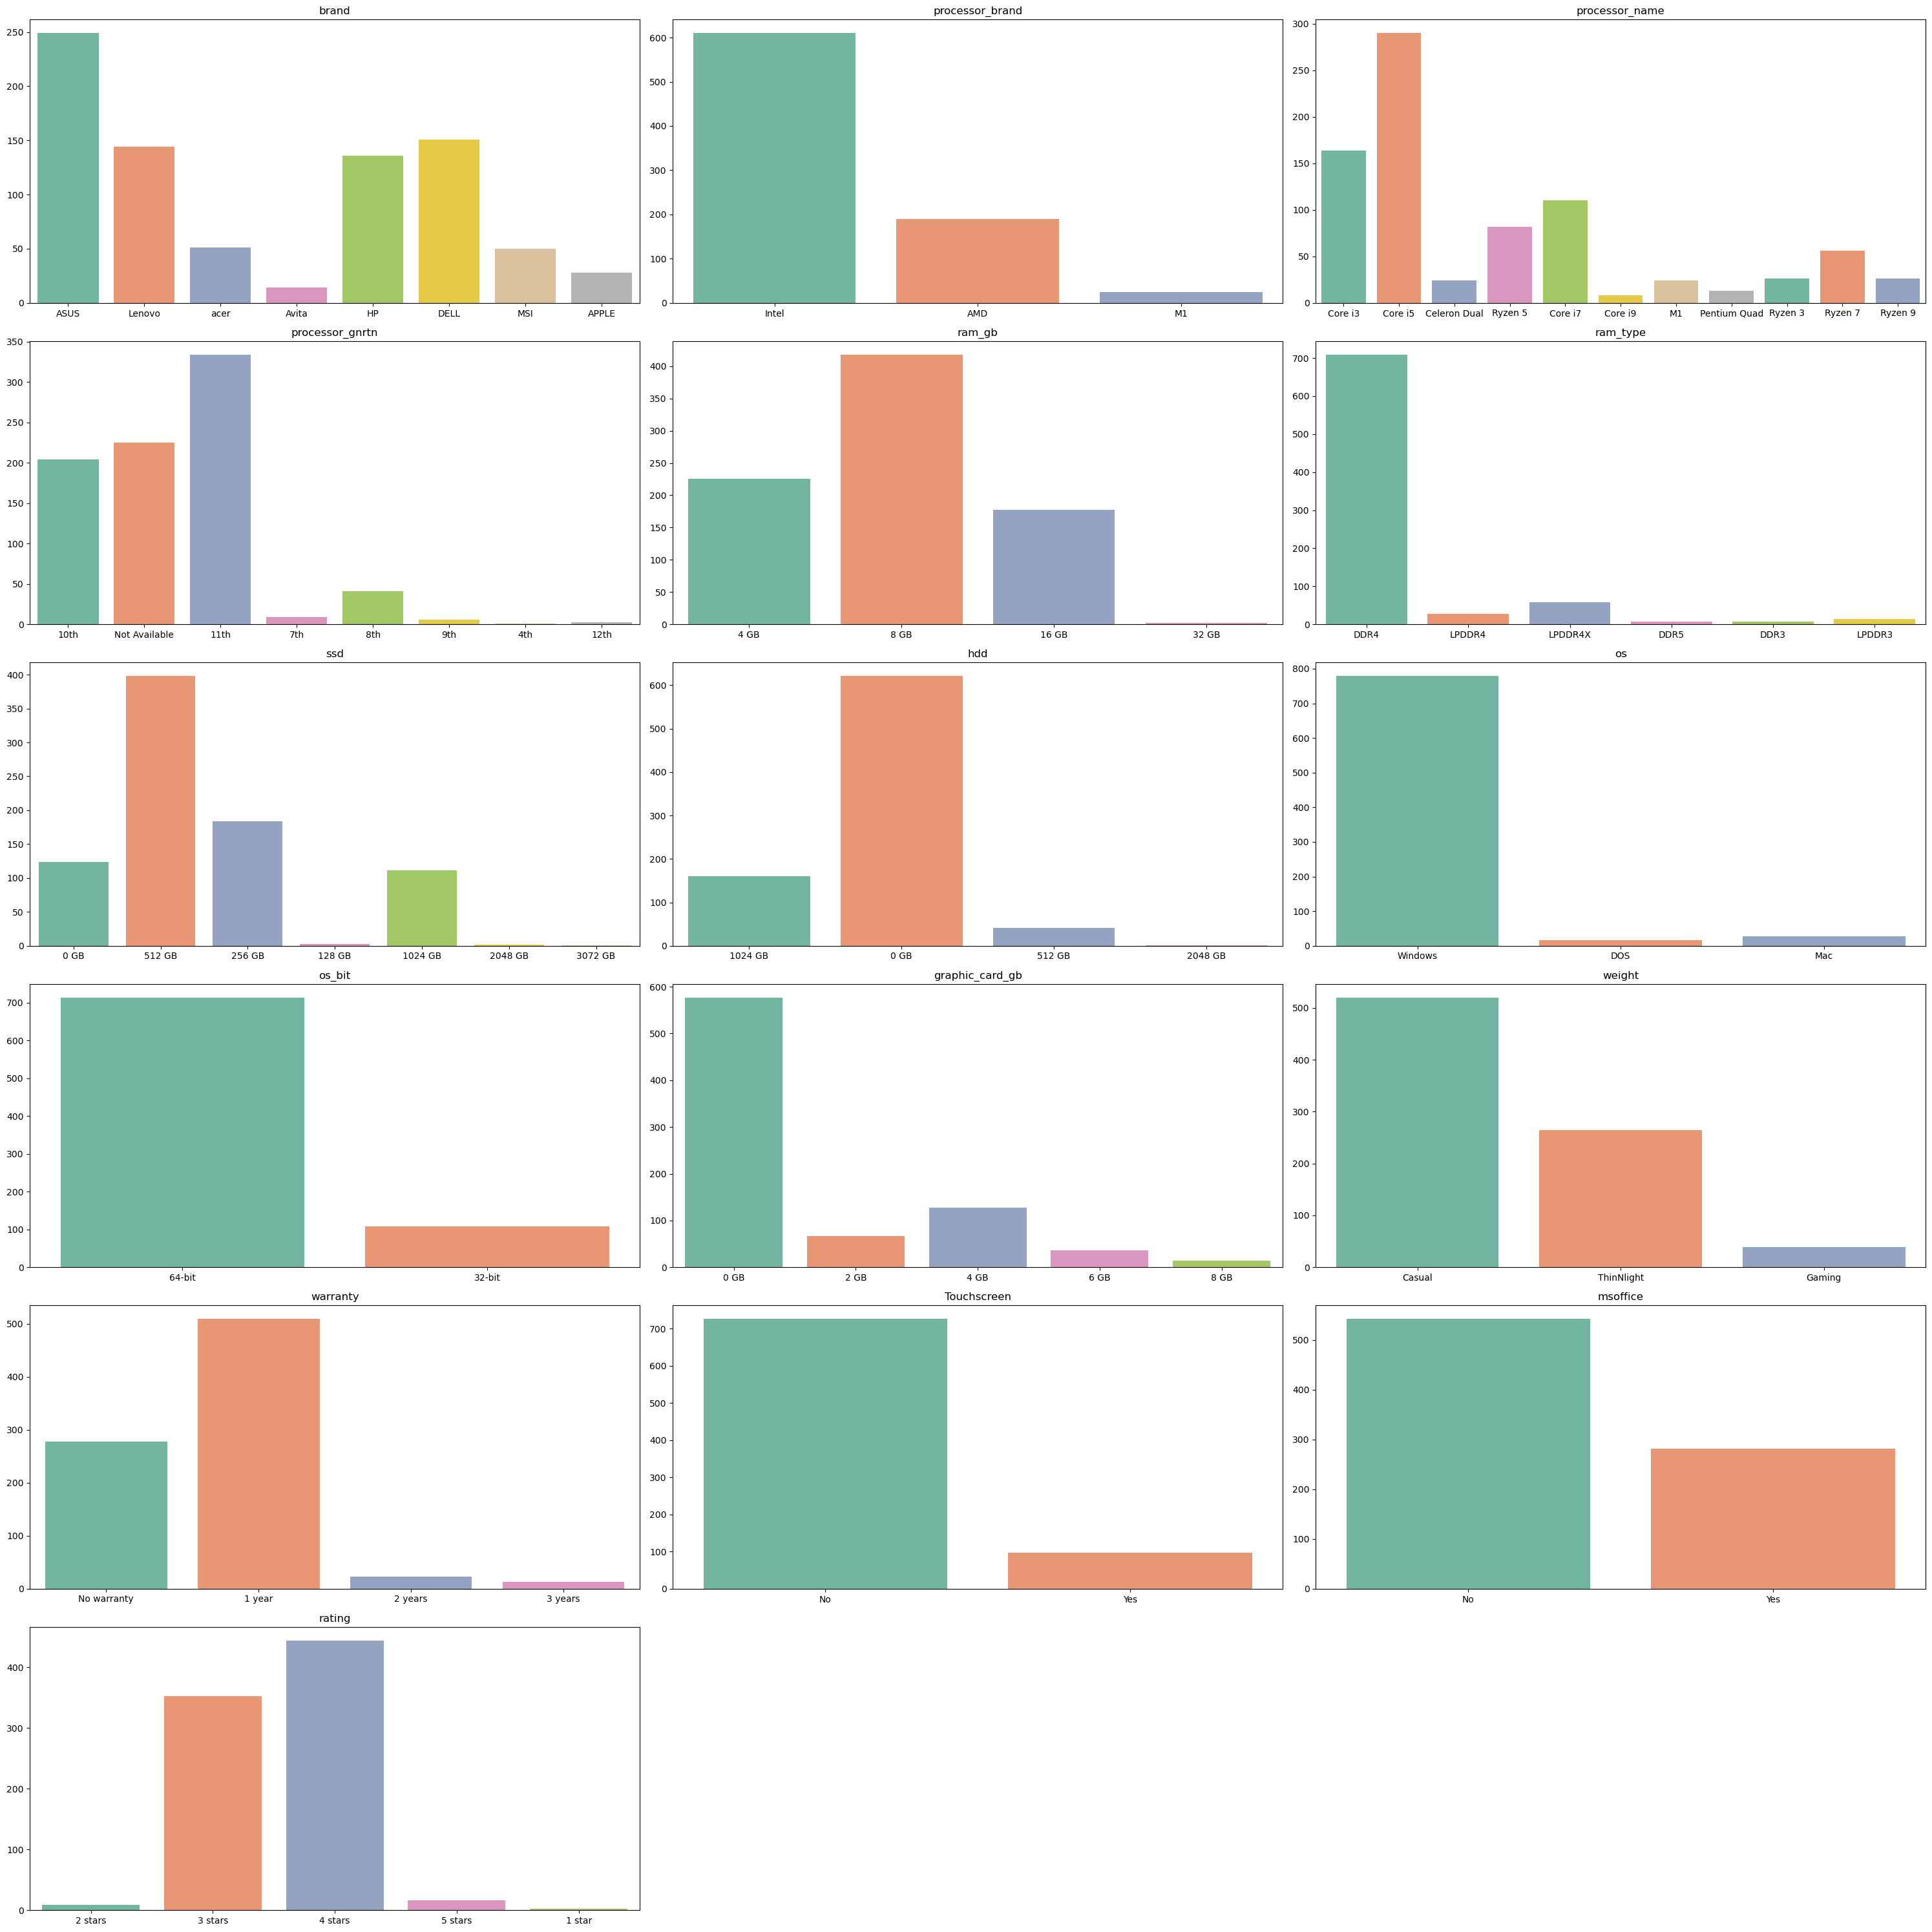

In [5]:
plot_all_countplot(df)

In [6]:
# Kullanacağım kolonlar:
#-brand
#-processor_brand
#-processer_name
#-ram_gb
#-ssd
#-hdd
#-os
#-weight
#-Touchscreen
#-msoffice
#-Price

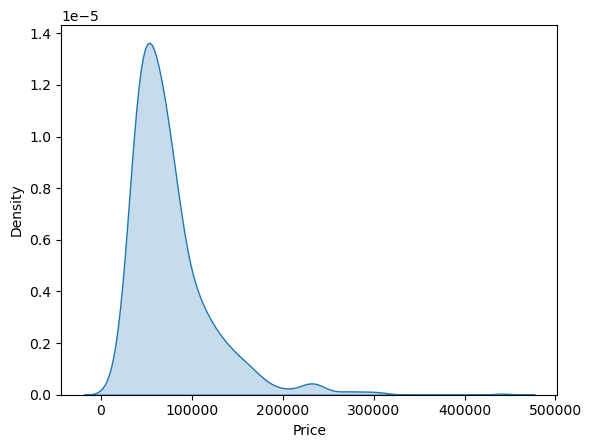

In [7]:
sns.kdeplot(data=df, x="Price", shade=True)
plt.show()

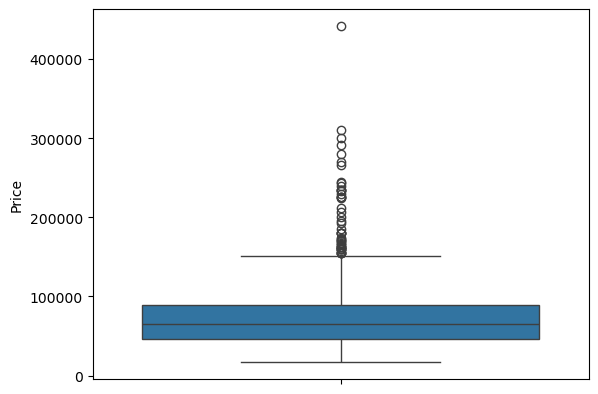

In [8]:
sns.boxplot(data = df, y = "Price")
plt.show()

In [9]:
# Aykırı değerleri atalım -> 7 satır silindi
df=df[df["Price"] < 250000]

In [10]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,816.000000,816.000000,816.000000
mean,74757.528186,317.982843,37.925245
std,39486.966986,1051.468535,122.201756
min,16990.000000,0.000000,0.000000
25%,45990.000000,0.000000,0.000000
50%,64090.000000,17.000000,2.000000
75%,88114.500000,143.250000,18.250000
max,244801.000000,15279.000000,1947.000000


In [11]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [12]:
del_cols = ["processor_gnrtn", "ram_type", "os_bit", "graphic_card_gb", "warranty", "rating", "Number of Ratings", "Number of Reviews"]
df = df.drop(columns=del_cols, axis=1)
df.head()

,brand,processor_brand,processor_name,ram_gb,ssd,hdd,os,weight,Touchscreen,msoffice,Price
0,ASUS,Intel,Core i3,4 GB,0 GB,1024 GB,Windows,Casual,No,No,34649
1,Lenovo,Intel,Core i3,4 GB,0 GB,1024 GB,Windows,Casual,No,No,38999
2,Lenovo,Intel,Core i3,4 GB,0 GB,1024 GB,Windows,Casual,No,No,39999
3,ASUS,Intel,Core i5,8 GB,512 GB,0 GB,Windows,Casual,No,No,69990
4,ASUS,Intel,Celeron Dual,4 GB,0 GB,512 GB,Windows,Casual,No,No,26990


In [13]:
for col in df.select_dtypes("object").columns:
    print(df[col].value_counts())
    print()

brand
ASUS      246
DELL      151
Lenovo    143
HP        136
acer       51
MSI        48
APPLE      27
Avita      14
Name: count, dtype: int64

processor_brand
Intel    604
AMD      189
M1        23
Name: count, dtype: int64

processor_name
Core i5         289
Core i3         164
Core i7         109
Ryzen 5          82
Ryzen 7          56
Ryzen 9          26
Ryzen 3          26
Celeron Dual     24
M1               23
Pentium Quad     13
Core i9           4
Name: count, dtype: int64

ram_gb
8 GB     417
4 GB     226
16 GB    172
32 GB      1
Name: count, dtype: int64

ssd
512 GB     398
256 GB     184
0 GB       123
1024 GB    106
128 GB       3
2048 GB      2
Name: count, dtype: int64

hdd
0 GB       615
1024 GB    160
512 GB      40
2048 GB      1
Name: count, dtype: int64

os
Windows    774
Mac         27
DOS         15
Name: count, dtype: int64

weight
Casual        513
ThinNlight    264
Gaming         39
Name: count, dtype: int64

Touchscreen
No     720
Yes     96
Name: count, dty

In [14]:
# bağımlı (y) & bağımsız (X) değişkenler
X = df.drop("Price", axis=1)
y = df["Price"]

In [15]:
# Eğitim - Test kümesi ayrımı
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = X_train.columns.to_list()
categorical_cols

['brand',
 'processor_brand',
 'processor_name',
 'ram_gb',
 'ssd',
 'hdd',
 'os',
 'weight',
 'Touchscreen',
 'msoffice']

In [17]:
preprocesser  = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
    ], remainder="passthrough"
)

X_train = preprocesser.fit_transform(X_train)
X_test = preprocesser.transform(X_test)

In [18]:
# Modeller
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [19]:
# Lineer Regresyon
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(r2_score(y_test, y_pred))

0.6405921780196896


In [20]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(r2_score(y_test, y_pred))

0.6474384347379907


In [21]:
# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(r2_score(y_test, y_pred))

0.6119252443313599


In [22]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    'n_estimators': [100, 200, 300, 500],        # Ağaç sayısı
    'max_depth': [None, 10, 20, 30],             # Ağaç derinliği
    'min_samples_split': [2, 5, 10],             # Bölünme için min örnek
    'min_samples_leaf': [1, 2, 4],               # Yaprakta kalacak min örnek
    'max_features': ['sqrt', 'log2']             # Her bölünmede bakılacak değişken sayısı
}

xgb_params = {
    'n_estimators': [100, 300, 500, 1000],       # Ağaç sayısı
    'learning_rate': [0.01, 0.05, 0.1, 0.3],     # Öğrenme oranı (eta)
    'max_depth': [3, 5, 7, 10],                  # Ağaç derinliği (XGB'de daha sığ tutulur)
    'subsample': [0.6, 0.8, 1.0],                # Satır bazlı örnekleme oranı
    'colsample_bytree': [0.6, 0.8, 1.0]          # Sütun bazlı örnekleme oranı
}

In [23]:
random_rf = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=rf_params, cv=5, n_jobs=-1)
random_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]})

In [24]:
random_rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [25]:
y_pred = random_rf.predict(X_test)
print(r2_score(y_test, y_pred))

0.7068038985218432


In [26]:
random_xgb = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=xgb_params, cv=5, n_jobs=-1)
random_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 300, 500, 1000],
                                        'subsample': [0.6, 0.8, 1.0]})

In [27]:
random_xgb.best_params_

{'subsample': 0.6,
 'n_estimators': 300,
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_bytree': 0.8}

In [28]:
y_pred = random_xgb.predict(X_test)
print(r2_score(y_test, y_pred))

0.7093030214309692


In [29]:
# CatBoost deneyeceğim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from catboost import CatBoostRegressor

cat_cols = X_train.columns.to_list()

cat = CatBoostRegressor(
    iterations=500,
    learning_rate=0.04,
    depth=8,
    l2_leaf_reg=4,
    loss_function="RMSE",
    cat_features=cat_cols,
    random_state=42,
    verbose=100,
    early_stopping_rounds=50
)

cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)
print(r2_score(y_test, y_pred))

0:	learn: 40196.5040485	total: 181ms	remaining: 1m 30s
100:	learn: 19138.3701854	total: 4.06s	remaining: 16s
200:	learn: 16900.7513084	total: 7.9s	remaining: 11.7s
300:	learn: 15360.7438907	total: 12s	remaining: 7.91s
400:	learn: 13898.3518719	total: 16.2s	remaining: 4.01s
499:	learn: 12492.9321744	total: 20.1s	remaining: 0us
0.6776807533907323


In [32]:
# XGBoost modelini kaydet
import pickle

with open("laptop_price_model.pkl", "wb") as f:
    pickle.dump(
        {
            "model": random_xgb.best_estimator_,  
            "preprocessor": preprocesser          
        },
        f
    )